## Covid-19 Visualization
#### by Fery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load original dataset

df = pd.read_csv("datasets/data.csv") # data from kawalcovid19.id
stats = pd.read_csv("datasets/daily_stats.csv") # data from kawalcovid19.id
vaccinated = stats.loc[:,'Dosis pertama':'Dosis kedua (harian)']
stats = stats.loc[:,:'Case Growth Rate'].drop(columns=[
    'Kasus Impor', 'Kasus Lokal', 'PDP', 'ODP', 'Positif \n(=C)', 'Jumlah test/juta penduduk',])
df.head()

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
0,18-Mar,0,1,17,0,0,3,158,0,24,...,1,0,0,0,0,0,0,0,0,NaN
1,19-Mar,0,1,27,0,0,5,210,0,26,...,2,0,0,0,0,0,0,0,0,NaN
2,20-Mar,0,4,37,0,0,4,215,0,41,...,1,0,0,0,0,0,0,0,13,NaN
3,21-Mar,0,3,43,0,0,5,267,0,55,...,1,0,0,0,0,0,0,0,10,NaN
4,22-Mar,0,3,47,0,0,5,307,0,59,...,1,0,1,0,2,0,0,0,6,NaN


### Data per provinsi

In [3]:
df[df['Aceh'] == 'Aceh'] # shown 7 different tables that will be used

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
331,Kasus Harian,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
666,Kasus Aktif,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
995,Sembuh,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
1324,Sembuh Harian,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
1653,Meninggal Dunia,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN
1985,Meninggal Dunia Harian,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,NaN


In [4]:
diff_table = df[df['Aceh'] == 'Aceh'].index # index of different table
diff_table

Int64Index([331, 666, 995, 1324, 1653, 1985], dtype='int64')

In [5]:
exclude = df[df['Aceh'] == 'Jakarta'].index
exclude[0] # index of table that will be excluded

2315

In [6]:
# seperate the tables
total_kasus = df.iloc[:diff_table[0]-1].reset_index(drop=True)
kasus_harian = df.iloc[diff_table[0]+1:diff_table[1]-1].reset_index(drop=True)
kasus_aktif = df.iloc[diff_table[1]+1:diff_table[2]-1].reset_index(drop=True)
sembuh = df.iloc[diff_table[2]+1:diff_table[3]-1].reset_index(drop=True)
sembuh_harian = df.iloc[diff_table[3]+1:diff_table[4]-1].reset_index(drop=True)
meninggal_dunia = df.iloc[diff_table[4]+1:diff_table[5]-1].reset_index(drop=True)
meninggal_dunia_harian = df.iloc[diff_table[5]+1:exclude[0]-3].reset_index(drop=True)

In [7]:
total_kasus.head(3)

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
0,18-Mar,0,1,17,0,0,3,158,0,24,...,1,0,0,0,0,0,0,0,0,NaN
1,19-Mar,0,1,27,0,0,5,210,0,26,...,2,0,0,0,0,0,0,0,0,NaN
2,20-Mar,0,4,37,0,0,4,215,0,41,...,1,0,0,0,0,0,0,0,13,NaN


In [8]:
# list of tables
list_table = [total_kasus, kasus_harian, kasus_aktif, sembuh,
              sembuh_harian, meninggal_dunia, meninggal_dunia_harian]

In [9]:
for table in list_table:
    year2020end_index = table[table['Total Kasus'] == '31 Dec'].index
    year2020 = table.iloc[:year2020end_index[0]+1]
    add2020 = [str(day) + "-2020" for day in year2020['Total Kasus']] # add '-2020' to each date before 1 Jan 2021
    year2021 = table.iloc[year2020end_index[0]+1:]
    add2021 = [str(day) + "-2021" for day in year2021['Total Kasus']] # add '-2021' to each date after 31 Dec 2020
    add2020.extend(add2021)
    table['Total Kasus'] = add2020
    table['Total Kasus'] = [day.replace(" ","-") for day in table['Total Kasus']]
    table.rename(columns={'Total Kasus': 'Date'}, inplace=True)
    table.set_index('Date', inplace=True)

In [10]:
total_kasus.tail(3)

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?,Unnamed: 36
Date,,,,,,,,,,,,,,,,,,,,,
8-Feb-2021,"9,323","28,537","26,675","5,432","4,647","23,754","296,969","4,861","169,207","136,378",...,"29,596","3,634","6,595","6,867","15,775","4,499","6,365","4,470",0,NaN
9-Feb-2021,"9,370","28,990","26,740","5,460","4,659","23,982","300,406","4,883","169,982","137,326",...,"29,669","3,673","6,600","6,895","15,838","4,678","6,478","4,501",0,NaN
10-Feb-2021,"9,373","29,295","26,770","5,549","4,666","24,273","303,715","4,928","170,642","138,546",...,"29,842","3,713","6,630","6,918","15,939","4,701","6,568","4,527",0,NaN


In [11]:
# get dataframe's name
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [12]:
# check the number of rows & columns of tables
for table in list_table:
    print(f"{get_df_name(table):<25} contains {table.shape[0]} rows and {table.shape[1]} columns")
    
# from the results, we can see that some of the table has different number of rows
# because of the early covid-19 data hasn't been there.

total_kasus               contains 330 rows and 36 columns
kasus_harian              contains 333 rows and 36 columns
kasus_aktif               contains 327 rows and 36 columns
sembuh                    contains 327 rows and 36 columns
sembuh_harian             contains 327 rows and 36 columns
meninggal_dunia           contains 330 rows and 36 columns
meninggal_dunia_harian    contains 326 rows and 36 columns


In [13]:
total_kasus.info() # the data type is not numeric

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 18-Mar-2020 to 10-Feb-2021
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Aceh         330 non-null    object
 1   Bali         330 non-null    object
 2   Banten       330 non-null    object
 3   Babel        330 non-null    object
 4   Bengkulu     330 non-null    object
 5   DIY          330 non-null    object
 6   Jakarta      330 non-null    object
 7   Jambi        330 non-null    object
 8   Jabar        330 non-null    object
 9   Jateng       330 non-null    object
 10  Jatim        330 non-null    object
 11  Kalbar       330 non-null    object
 12  Kaltim       330 non-null    object
 13  Kalteng      330 non-null    object
 14  Kalsel       330 non-null    object
 15  Kaltara      330 non-null    object
 16  Kep Riau     330 non-null    object
 17  NTB          330 non-null    object
 18  Sumsel       330 non-null    object
 19  Sumbar       330

In [14]:
def to_numeric(df):
    col = df.columns
    for i in range(len(col)):
        df[col[i]] = pd.to_numeric(df[col[i]].fillna(0).apply(lambda x: str(x).replace(",", "")))
        # fill NaN values to 0, remove ',' from each digit, then change it to numeric data type
    
    return df

def process(newtable): 
    newtable = newtable.drop("Unnamed: 36", axis=1) # drop "Unnamed: 36" column
    newtable = to_numeric(newtable) # change data type to integer
    newtable['Total'] = newtable.sum(axis=1) # make a new column: the sum of each row named 'total'
    newtable.index = pd.to_datetime(newtable.index) # changed index to date time data type
    return newtable

In [15]:
result = [process(i) for i in list_table]

total_kasus, kasus_harian, kasus_aktif, sembuh, sembuh_harian, meninggal_dunia, meninggal_dunia_harian = result
# assign final result to each table

In [16]:
rolling_latest = (kasus_harian.drop('Total', axis=1).rolling(7).mean().iloc[-1])
rolling = kasus_harian.drop('Total', axis=1).rolling(7).mean()

cols = [col for col in rolling]
prc_from_peak = []
for col in rolling:
    maxcase = max(rolling.loc[:,col].dropna())
    latest = rolling_latest[col]
    prc = round((maxcase-latest)/maxcase*100,1)
    prc_from_peak.append(prc)

res = pd.DataFrame(list(zip(cols,prc_from_peak)))
res.rename(index=res.iloc[:,0], inplace=True)
res.drop(columns=0, inplace=True)

category = pd.cut(pd.Series(res.values.flatten(), index=cols),[min(prc_from_peak)-1,25,50,100]).cat.codes

# https://news.detik.com/berita/d-5045402/ini-indikator-pemerintah-dalam-menentukan-zona-merah-hingga-hijau-corona/2

### Statistik Nasional

In [17]:
stats.head(2)

,Unnamed: 0,Kasus harian,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),...,Dalam Proses,Spesimen,Orang yang dites,Vaksinasi (ineligible),Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate
0,2-Mar,2,2,2,100.00%,0,0,0.00%,0,0,...,2.0,NaN,NaN,NaN,169.5,169.5,0.00,0.59%,NaN,NaN
1,3-Mar,0,2,2,100.00%,0,0,0.00%,NaN,0,...,2.0,NaN,2,NaN,170.5,170.5,#DIV/0!,0.59%,0.00%,0.00%


In [18]:
statsdecix = stats[stats['Unnamed: 0'] == '31-Dec'].index
stats2020 = stats.iloc[:statsdecix[0]+1]
stats2021 = stats.iloc[statsdecix[0]+1:]
adds2020 = [day + "-2020" for day in stats2020['Unnamed: 0']]
adds2021 = [day + "-2021" for day in stats2021['Unnamed: 0']]
adds2020.extend(adds2021)
stats['Unnamed: 0'] = adds2020
stats.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
stats.set_index('Date', inplace=True)
stats = to_numeric(stats[['Kasus harian', 'Total kasus', 'Kasus aktif', 'Sembuh\n(baru)', 'Sembuh', 'Meninggal\n(baru)',
               'Meninggal\nDunia', 'Suspek aktif', 'Jumlah orang diperiksa', 'Negatif']])
stats.index = pd.to_datetime(stats.index)

In [19]:
stats.head(2)

,Kasus harian,Total kasus,Kasus aktif,Sembuh\n(baru),Sembuh,Meninggal\n(baru),Meninggal\nDunia,Suspek aktif,Jumlah orang diperiksa,Negatif
Date,,,,,,,,,,
2020-03-02,2,2,2,0,0,0,0,0,339,335
2020-03-03,0,2,2,0,0,0,0,0,341,337


In [20]:
def process_stats(df):
    jdk = df['Jumlah orang diperiksa'].values # jumlah orang diperiksa kumulatif
    jdh = [jdk[i+1]-jdk[i] for i in range(len(jdk)-1)] # jumlah orang diperiksa harian
    jdh.insert(0,0)
    df['Jumlah orang diperiksa (harian)'] = jdh
    
    nk = df['Negatif'].values # negatif kumulatif
    nh = [nk[i+1]-nk[i] for i in range(len(nk)-1)] # negatif harian
    nh.insert(0,0)
    df['Negatif (harian)'] = nh
    
    prdf = df[['Kasus harian', 'Jumlah orang diperiksa (harian)']] # columns to find positivity rate
    prdf = prdf.to_numpy()
    df['Positivity rate (%)'] = [round(prdf[i][0]/prdf[i][1]*100,2) for i in range(len(prdf))]
    
    # rolling average weekly positivity rate
    temp1, temp2 = df['Kasus harian'].rolling(7).sum().values, df['Jumlah orang diperiksa (harian)'].rolling(7).sum().values
    df['Weekly positivity rate (%)'] = np.round(temp1/temp2*100,2)
    
    return df

In [21]:
stats = process_stats(stats)
vaccinated = to_numeric(vaccinated)
vaccinated.index = stats.index
vaccinated = vaccinated.loc['2021-01-13':]
vaccinated['Dosis kumulatif'] = vaccinated['Dosis pertama'] + vaccinated['Dosis kedua']
vaccinated['Dosis harian'] = vaccinated['Dosis pertama (harian)'] + vaccinated['Dosis kedua (harian)']

In [22]:
stats.tail(2)

,Kasus harian,Total kasus,Kasus aktif,Sembuh\n(baru),Sembuh,Meninggal\n(baru),Meninggal\nDunia,Suspek aktif,Jumlah orang diperiksa,Negatif,Jumlah orang diperiksa (harian),Negatif (harian),Positivity rate (%),Weekly positivity rate (%)
Date,,,,,,,,,,,,,,
2021-02-10,8776,1183555,168416,9520,982972,191,32167,77526,6553179,5369624,41053,32277,21.38,26.33
2021-02-11,8435,1191990,166492,10145,993117,214,32381,76911,6591580,5399590,38401,29966,21.97,25.59


In [23]:
# https://menujuherdimmunity.id/

mhi = round((stats['Sembuh'][-1] + (vaccinated['Dosis pertama'].values[-1]+\
                                    vaccinated['Dosis kedua'].values[-1]))/181554465*100,4)

### Visualisasi

In [24]:
linecolors = {2:'#006837',1:'#D9A01A',0:'#a50026'}
fillcolors = {2:'#86cb66',1:'#FFB300',0:'#CF2B2E'}

from matplotlib import rcParams
from matplotlib.patches import Patch

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [25]:
grid = pd.read_csv('datasets/indo.csv', index_col=0)
grid_loc = grid.T.stack().reset_index().set_index(0)
grid_loc = pd.concat([grid_loc[:'Jatim'],grid_loc['Sulut':]],axis=0)

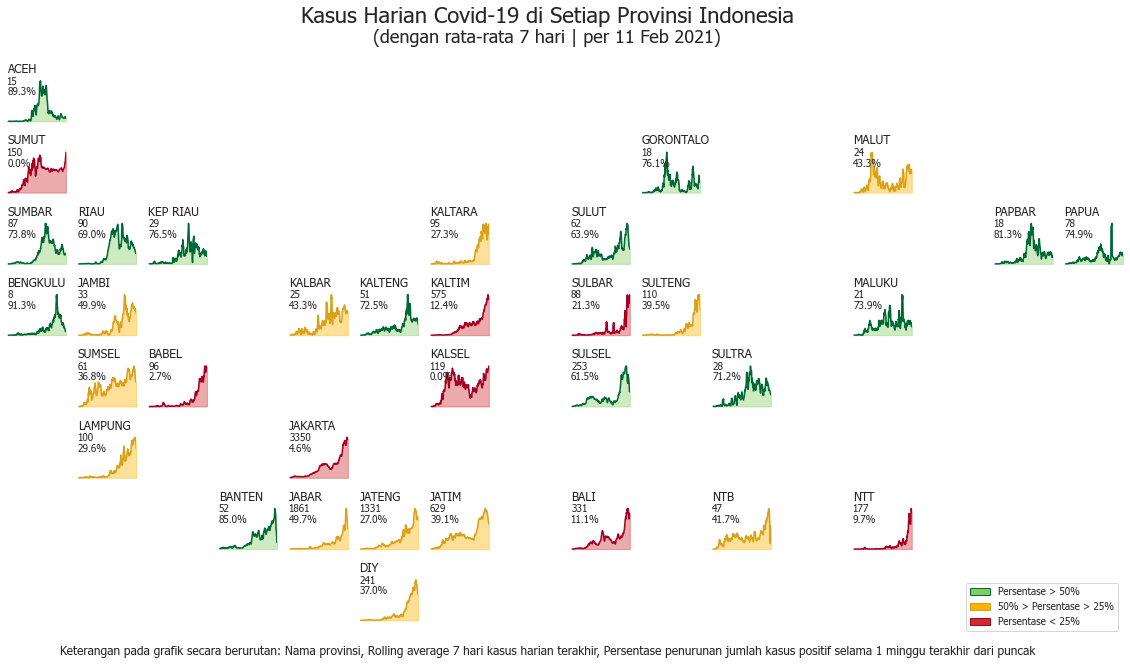

In [101]:
fig, axs = plt.subplots(8,16, figsize=(20,10))

# kasus harian per provinsi
for col in grid_loc.index:
    the_data = kasus_harian.rolling(7).mean().loc[:, col]
#     percentage = round((kasus_harian.rolling(7).mean().loc[:, col]\
#                         [-1]/kasus_harian.rolling(7).mean().loc[:,'Total'][-1])*100,1)
    percentage = res[res.index==col].values[0][0]
    colorfill = fillcolors[category.loc[col]]
    color = linecolors[category.loc[col]]
#     color = "#505050"
    
    y = int(grid_loc.loc[col]['level_0'])
    x = int(grid_loc.loc[col]['level_1'])
    ax = axs[x,y]
    
    
    the_data.plot(ax=ax, c=color)
    ax.set_title(col.upper(), x=0, y=1, fontsize=12, loc='left')
    ax.set_xlabel("")
    l1 = ax.lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax.fill_between(x1, y1, alpha=0.4, color=colorfill)
    
    number = int(the_data[-1])
    ax.text(x=0,y=0.88,s=number, transform=ax.transAxes, fontsize=10)
    ax.text(x=0,y=0.64, s=str(percentage)+"%", transform=ax.transAxes, fontsize=10)

for row in axs:
    for ax in row:
        plt.subplots_adjust(hspace=0.6)
        ax.axis('off')
        
plt.suptitle("Kasus Harian Covid-19 di Setiap Provinsi Indonesia", fontsize=22)
plt.text(s="(dengan rata-rata 7 hari | per "+\
         max(stats.index).to_pydatetime().strftime("%d %b %Y")+")", x=0.5, y=.93, fontsize=18,
         ha='center', transform=fig.transFigure)
plt.text(s="Keterangan pada grafik secara berurutan: Nama provinsi, Rolling average 7 hari kasus harian terakhir, \
Persentase penurunan jumlah kasus positif selama 1 minggu terakhir dari puncak",
         x=0.5, y=.08, fontsize=12,
         ha='center', transform=fig.transFigure)

legend_elements = [Patch(facecolor='#86cb66', edgecolor='#006837', label='Persentase > 50%'),
                   Patch(facecolor='#FFB300', edgecolor='#D9A01A', label='50% > Persentase > 25%'),
                   Patch(facecolor='#CF2B2E', edgecolor='#a50026', label='Persentase < 25%')]

# Create the figure
plt.legend(handles=legend_elements)

plt.show()

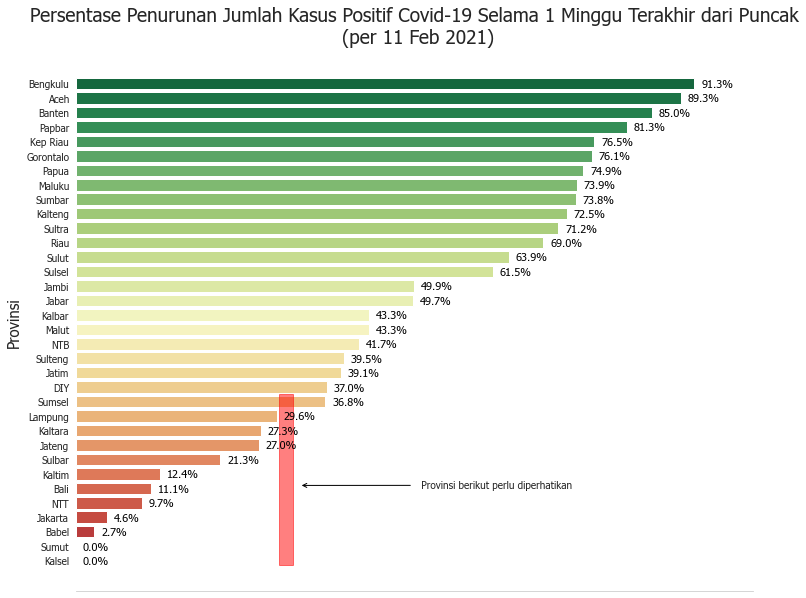

In [99]:
res2 = res.copy()
res2.drop('?', inplace=True)
res2.sort_values(by=1, ascending=False, inplace=True)

ax = sns.catplot(y=res2.index, x=1, data=res2, kind='bar', height=8,
                 aspect=1.3, palette='RdYlGn_r')

plt.title("Persentase Penurunan Jumlah Kasus Positif Covid-19 Selama 1 Minggu Terakhir dari Puncak\n (per "\
          +max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",\
          fontsize=19, pad=10, loc='center')
plt.xlabel('')
plt.ylabel('Provinsi', loc='center', fontsize=15)
plt.xticks(np.arange(0,110,10))
plt.grid(visible=False)
plt.axhspan(33.3, 21.5, xmin=.3, xmax=.32, color='red', alpha=0.5)
plt.annotate("  Provinsi berikut perlu diperhatikan", xy=(33, 27.8), xytext=(50, 28),
             arrowprops=dict(arrowstyle="->", color='black'))
sns.despine(left=True)
plt.xticks([])

for i, v in enumerate(res2[1]):
    plt.text(v + 1, i + .25, str(v)+"%", color='black', fontsize=11)
    
plt.show()

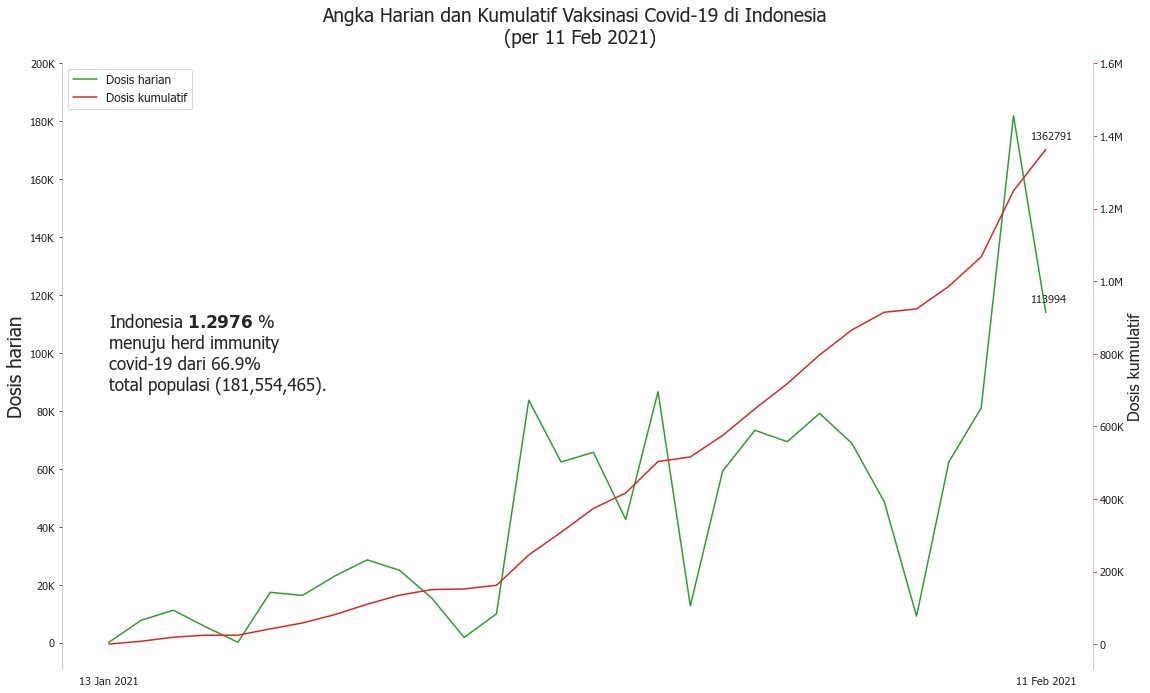

In [283]:
fig, ax1 = plt.subplots(figsize=(15,9))
fig.tight_layout()
color = 'tab:green'

ax1.set_ylabel('Dosis harian', fontsize=19)
ax1 = sns.lineplot(x=vaccinated.index, y='Dosis harian', data = vaccinated, color=color,\
                  label='Dosis harian', legend=None)
ax1.tick_params(axis='y')

yticks = np.arange(0,np.ceil(max(vaccinated['Dosis harian']))+30000,20000)
yticklabels =[]
for number in yticks:
    if number > 1000000:
        numbertext = str(int(number//1000000))+'.'+str(int((number%1000000)/100000))+"M"
        yticklabels2.append(numbertext)
    elif number > 1000:
        numbertext = str(int(number/1000))+"K"
        yticklabels.append(numbertext)
    else:
        numbertext = str(int(number))
        yticklabels.append(numbertext)
        
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels, fontsize=11)
ax1.set_xlabel('')
ax1.grid(False)
ax1.annotate(vaccinated['Dosis harian'].values[-1],\
             (vaccinated.index[-1],vaccinated['Dosis harian'].values[-1]),\
             xytext=(-15, 10), textcoords='offset points', fontsize=11)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Dosis kumulatif', fontsize=16)
ax2 = sns.lineplot(x=vaccinated.index, y='Dosis kumulatif', data = vaccinated, sort=False, color=color,\
                  label='Dosis kumulatif', legend=None)
ax2.tick_params(axis='y', color=color)

yticks2 = np.arange(0,np.ceil(max(vaccinated['Dosis kumulatif']))+300000,200000)
yticklabels2 =[]
for number in yticks2:
    if number >= 1000000:
        numbertext = str(int(number//1000000))+'.'+str(int((number%1000000)/100000))+"M"
        yticklabels2.append(numbertext)
    elif number > 1000:
        numbertext = str(int(number/1000))+"K"
        yticklabels2.append(numbertext)
    else:
        numbertext = str(int(number))
        yticklabels2.append(numbertext)
        
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticklabels2, fontsize=11)
ax2.grid(False)
ax2.annotate(vaccinated['Dosis kumulatif'].values[-1], (vaccinated.index[-1],vaccinated['Dosis kumulatif'].values[-1]),\
             xytext=(-15, 10), textcoords='offset points', fontsize=11)

for axs in (ax1, ax2):
    axs.set_xticks([min(vaccinated.index), max(vaccinated.index)])
    axs.set_xticklabels([min(vaccinated.index).to_pydatetime().strftime("%d %b %Y"),\
                         max(vaccinated.index).to_pydatetime().strftime("%d %b %Y")], fontsize=11)

plt.annotate("Indonesia " +r"$\bf{" + str(mhi) + "}$"+' % \nmenuju herd immunity\ncovid-19 dari 66.9% \n\
total populasi (181,554,465).',\
             (vaccinated.index[0],700000), xytext=(0,0), textcoords='offset points', fontsize=17)
plt.title("Angka Harian dan Kumulatif Vaksinasi Covid-19 di Indonesia \n (per "+\
          max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",\
          fontsize=19, pad=20, loc='center')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

axs = (ax1,ax2)
spines = ('top', 'bottom')
for ax in axs:
    for spine in spines:        
        ax.spines[spine].set_visible(False)

ax2.legend(lines, labels, loc='upper left', fontsize=12)

plt.show()

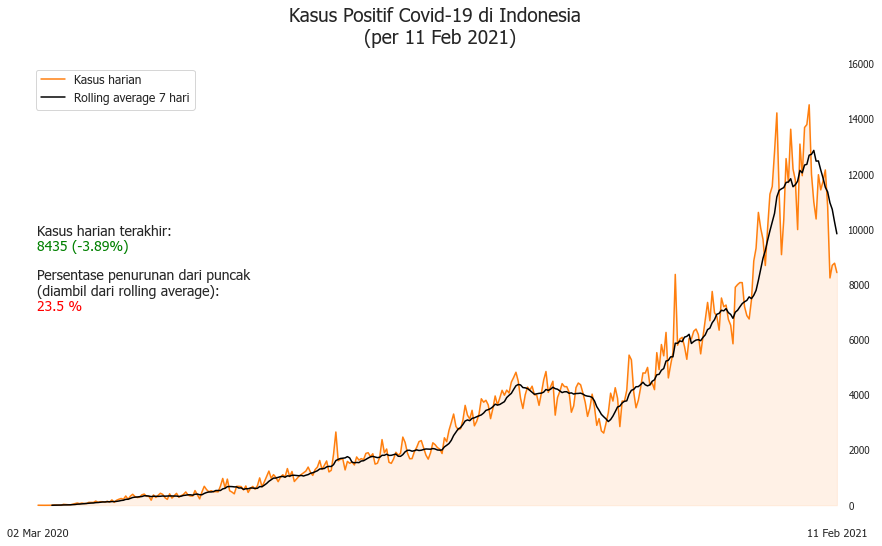

In [95]:
fig, ax = plt.subplots(figsize=(12,7))
fig.tight_layout()
color = 'tab:orange'

kh = stats['Kasus harian']
khr = kh.rolling(7).mean()

ax = sns.lineplot(x=stats.index, y='Kasus harian', data = stats, color=color,\
                  label='Kasus harian', legend=None)
ax = sns.lineplot(x=stats.index, y=khr, data=stats, color='black',\
                 label='Rolling average 7 hari', legend=None)
ax.margins(x=0.01)
ax.tick_params(axis='y')
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1, y1, alpha=0.1, color=color)
ax.yaxis.tick_right()

yticks = np.arange(0,int(np.ceil(max(kh.dropna())))+2000,2000)
ax.set_yticks(yticks)
ax.set_xticks([min(stats.index), max(stats.index)])
ax.set_xticklabels([min(stats.index).to_pydatetime().strftime("%d %b %Y"),\
                     max(stats.index).to_pydatetime().strftime("%d %b %Y")], fontsize=11)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(length=0)
ax.grid(False)

spines = ['top', 'right', 'bottom', 'left']
for spine in spines:
    ax.spines[spine].set_visible(False)

    
perc = round((kh[-1]-kh[-2])/kh[-2]*100,2)

maxcasez = max(khr.dropna())
latestz = khr[-1]
prcz = round((maxcasez-latestz)/maxcasez*100,1)

colorz, colorzz = 'red', 'red'
if perc > 0:
    colorz = 'red'
elif perc == 0:
    colorz = 'orange'
else:
    colorz = 'green'

if prcz > 50:
    colorzz = 'green'
elif prcz > 25:
    colorzz = 'orange'
elif prcz < 25:
    colorzz = 'red'

plt.title("Kasus Positif Covid-19 di Indonesia \n (per "+max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",\
          fontsize=19, pad=20, loc='center')    

plt.text(s="Kasus harian terakhir:", x=0.045, y=0.63, fontsize=14, ha='left', transform=fig.transFigure)
plt.text(s=str(kh[-1])+" "+"("+str(perc)+"%)", x=0.045, y=0.60, fontsize=14, ha='left', transform=fig.transFigure,color=colorz)
plt.text(s="Persentase penurunan dari puncak\n(diambil dari rolling average):",\
         x=0.045, y=0.51, fontsize=14, ha='left', transform=fig.transFigure)
plt.text(s=str(prcz)+" %", x=0.045, y=0.48, fontsize=14, ha='left', transform=fig.transFigure,color=colorzz)


plt.legend(fontsize=12)
plt.show()

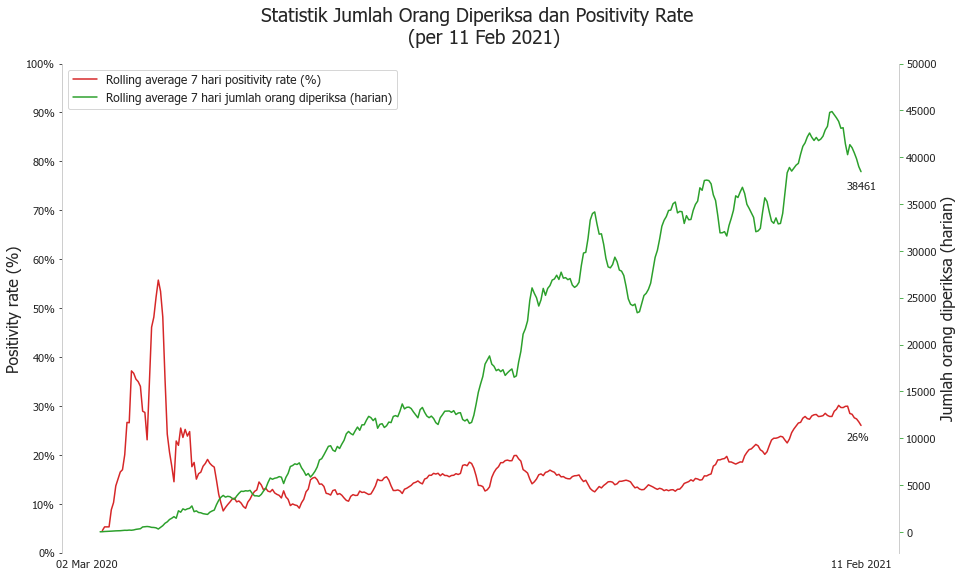

In [306]:
pr = stats[np.isfinite(stats['Positivity rate (%)'])]['Positivity rate (%)']
pr = pr[pr.index != '2020-03-16']
prra = pr.rolling(7).mean()

jodh = stats['Jumlah orang diperiksa (harian)']
jodh = jodh[jodh.index != '2020-03-16']
jodhra = jodh.rolling(7).mean()

fig, ax1 = plt.subplots(figsize=(15,9))
color = 'tab:red'

ax1.set_ylabel('Positivity rate (%)', fontsize=16)
ax1 = sns.lineplot(x=pr.index, y=prr, data = pr, color=color,\
                  label='Rolling average 7 hari positivity rate (%)', legend=None)
ax1.tick_params(axis='y')

yticks = np.arange(0,101,10)
        
ax1.set_yticks(yticks)
ax1.set_yticklabels([str(ytick)+"%" for ytick in yticks], fontsize=11)
ax1.set_xlabel('')
ax1.grid(False)

ax1.annotate(str(round(prra.values[-1],2)))+"%", (prra.index[-1],prra.values[-1]-5),\
             xytext=(-15, 10), textcoords='offset points', fontsize=11)


#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'
#line plot creation
ax2.set_ylabel('Jumlah orang diperiksa (harian)', fontsize=16)
ax2 = sns.lineplot(x=jodh.index, y=jodhra, data = jodh, sort=False, color=color,\
                  label='Rolling average 7 hari jumlah orang diperiksa (harian)', legend=None)
ax2.tick_params(axis='y', color=color)

yticks2 = np.arange(0,int(np.ceil(max(jodhra.dropna())))+10000,5000)
        
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2,fontsize=11)

ax2.annotate(str(int(round(jodhra.values[-1],0))), (jodh.index[-1],jodhra.values[-1]-3000),\
             xytext=(-15, 10), textcoords='offset points', fontsize=11)

for axs in (ax1, ax2):
    axs.set_xticks([min(jodh.index), max(jodh.index)])
    axs.set_xticklabels([min(jodh.index).to_pydatetime().strftime("%d %b %Y"),\
                         max(jodh.index).to_pydatetime().strftime("%d %b %Y")], fontsize=11)


plt.title("Statistik Jumlah Orang Diperiksa dan Positivity Rate \n (per "+\
          max(stats.index).to_pydatetime().strftime("%d %b %Y")+")",\
          fontsize=19, pad=20, loc='center')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax2.legend(lines, labels, loc='upper left', fontsize=12)
axs = (ax1,ax2)
spines = ('top', 'bottom')
for ax in axs:
    for spine in spines:        
        ax.spines[spine].set_visible(False)

plt.grid(False)
plt.show()

In [91]:
stats.tail()

,Kasus harian,Total kasus,Kasus aktif,Sembuh\n(baru),Sembuh,Meninggal\n(baru),Meninggal\nDunia,Suspek aktif,Jumlah orang diperiksa,Negatif,Jumlah orang diperiksa (harian),Negatif (harian),Positivity rate (%),Weekly positivity rate (%)
Date,,,,,,,,,,,,,,
2021-02-07,10827,1157837,176291,10806,949990,163,31556,76029,6445583,5287746,30900,20073,35.04,27.70
2021-02-08,8242,1166079,171288,13038,963028,207,31763,77601,6473598,5307519,28015,19773,29.42,27.10
2021-02-09,8700,1174779,169351,10424,973452,213,31976,77086,6512126,5337347,38528,29828,22.58,26.93
2021-02-10,8776,1183555,168416,9520,982972,191,32167,77526,6553179,5369624,41053,32277,21.38,26.33
2021-02-11,8435,1191990,166492,10145,993117,214,32381,76911,6591580,5399590,38401,29966,21.97,25.59


<AxesSubplot:xlabel='Date'>

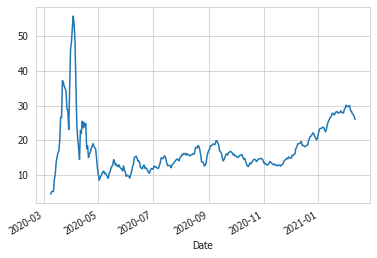

In [160]:

prr.plot()

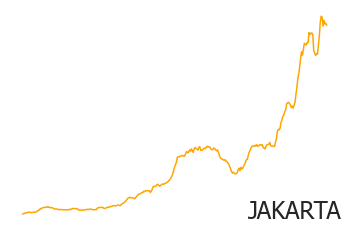

In [123]:
plt.plot(kasus_harian.index,kasus_harian['Jakarta'].rolling(7).mean(), c='orange')
plt.axis('off')
plt.title('Jakarta'.upper(),x=1,y=0,fontsize=24,loc='right')
plt.show()